#### Append the "icn/icn_m1/restructure" repository path to "sys" in order to include our IO.py module

In [79]:
import sys
sys.path.append("/Users/richardkoehler/Documents/GitHub/icn/icn_m1/restructure")

import bids
from matplotlib import pyplot as plt
import mne
import mne_bids
import os
import pybv

import IO

#### Enter location of Berlin_BIDS dataset

In [53]:
root = '/Users/richardkoehler/Charité - Universitätsmedizin Berlin/Interventional Cognitive Neuromodulation - Data/Datasets/BIDS_Berlin/'

#### Getting all of our  with pybids

In [64]:
layout = bids.BIDSLayout(root)
all_files = layout.get()
print("There are {} files in the layout.".format(len(all_files)))
print("\nThe first 5 files are:")
all_files[:5]

There are 314 files in the layout.

The first 5 files are:


[<BIDSJSONFile filename='/Users/richardkoehler/Charité - Universitätsmedizin Berlin/Interventional Cognitive Neuromodulation - Data/Datasets/BIDS_Berlin/dataset_description.json'>,
 <BIDSJSONFile filename='/Users/richardkoehler/Charité - Universitätsmedizin Berlin/Interventional Cognitive Neuromodulation - Data/Datasets/BIDS_Berlin/participants.json'>,
 <BIDSDataFile filename='/Users/richardkoehler/Charité - Universitätsmedizin Berlin/Interventional Cognitive Neuromodulation - Data/Datasets/BIDS_Berlin/participants.tsv'>,
 <BIDSFile filename='/Users/richardkoehler/Charité - Universitätsmedizin Berlin/Interventional Cognitive Neuromodulation - Data/Datasets/BIDS_Berlin/README'>,
 <BIDSDataFile filename='/Users/richardkoehler/Charité - Universitätsmedizin Berlin/Interventional Cognitive Neuromodulation - Data/Datasets/BIDS_Berlin/sub-001/ses-20171014/ieeg/sub-001_ses-20171014_task-30sblockrotaON_run-0_channels.tsv'>]

#### Using pybids, read all different tasks in our dataset

In [85]:
tasks = layout.get_tasks()
print("There are {} different tasks in the layout.".format(len(tasks)))
print("\nThe first 5 tasks are: ")
tasks[:5]

There are 52 different tasks in the layout.

The first 5 tasks are: 


['30sblockrotaON',
 '30sblockrotaONstimOFFOFF25mASTNR18',
 '30sblockrotaONstimOFFON25mASTNL18',
 '30scuedstoppingstimOFFON25mASTNLRbilateralmedON',
 'evoked202001310001']

#### Likewise, mne_bids can return a list of all entities (handles) in one dataset

In [87]:
entity_vals = mne_bids.get_entity_vals(root, entity_key="subject")
print('list of subjects: ')
entity_vals

list of subjects: 


['001',
 '001-ses-001-1',
 '001-ses-001-AAHead',
 '001-ses-001-Kopf',
 '001-ses-001-ep2d',
 '001-ses-001-t1',
 '001-ses-001-t2',
 '002',
 '003',
 '004']

#### Oops, there seems to be a problem with a couple of imaging files, '001-ses-001-1' should be '001_ses-001-1' etc., but we can fix this later. Let's do some tests with our iEEG data for now:

#### Get all SelfpacedRotation recordings from our BIDS_Berlin Dataset

In [4]:
task_prefix = ["SelfpacedRotation"]
ieeg_files = IO.get_all_files(path=root, suffix=['.vhdr'], get_bids=True, prefix=task_prefix, bids_root=root)
for idx, ieeg_file in enumerate(ieeg_files):
    print(idx, ": ", os.path.basename(ieeg_file))

0 :  sub-002_ses-20200131_task-SelfpacedRotationR_acq-MedOn+StimOff_run-4_ieeg.vhdr
1 :  sub-002_ses-20200201_task-SelfpacedRotationR+MedOff+StimOn_run-3_ieeg.vhdr
2 :  sub-002_ses-20200201_task-SelfpacedRotationR+MedOff+StimOff_run-2_ieeg.vhdr
3 :  sub-004_ses-20200730_task-SelfpacedRotationR+MedOn+StimOff_run-8_ieeg.vhdr
4 :  sub-004_ses-20200730_task-SelfpacedRotationR+MedOff+StimOff_run-16_ieeg.vhdr
5 :  sub-004_ses-20200730_task-SelfpacedRotationL+MedOff+StimOff_run-15_ieeg.vhdr
6 :  sub-004_ses-20200730_task-SelfpacedRotationL+MedOn+StimOff_run-9_ieeg.vhdr


#### Pick a file to do some tests

In [5]:
test_file = ieeg_files[0]

#### Using mne_bids read the raw data + electrodes + events

In [56]:
raw = mne_bids.read_raw_bids(test_file, verbose=False)

Extracting parameters from /Users/richardkoehler/Charité - Universitätsmedizin Berlin/Interventional Cognitive Neuromodulation - Data/Datasets/mne_bids_example/sub-002/ses-20200131/ieeg/sub-002_ses-20200131_task-SelfpacedRotationR_acq-MedOn+StimOff_run-4_ieeg.vhdr...
Setting channel info structure...
Reading events from /Users/richardkoehler/Charité - Universitätsmedizin Berlin/Interventional Cognitive Neuromodulation - Data/Datasets/mne_bids_example/sub-002/ses-20200131/ieeg/sub-002_ses-20200131_task-SelfpacedRotationR_acq-MedOn+StimOff_run-4_events.tsv.
Reading channel info from /Users/richardkoehler/Charité - Universitätsmedizin Berlin/Interventional Cognitive Neuromodulation - Data/Datasets/mne_bids_example/sub-002/ses-20200131/ieeg/sub-002_ses-20200131_task-SelfpacedRotationR_acq-MedOn+StimOff_run-4_channels.tsv.
Reading electrode coords from /Users/richardkoehler/Charité - Universitätsmedizin Berlin/Interventional Cognitive Neuromodulation - Data/Datasets/mne_bids_example

<ipython-input-56-387f0b7138fe>:1: RuntimeWarning: There are channels without locations (n/a) that are not marked as bad: ['ANALOG_ROT_R_1']
  raw = mne_bids.read_raw_bids(test_file, verbose=False)
<ipython-input-56-387f0b7138fe>:1: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw = mne_bids.read_raw_bids(test_file, verbose=False)


#### mne_bids reads events automatically from **events.tsv

In [43]:
events, event_id = mne.events_from_annotations(raw)
print(events[:,0])

Used Annotations descriptions: ['Movement_End', 'Movement_Onset']
[ 73681  74241  81648  82148  89575  90015  96983  97462 104910 105479
 112707 113277 120484 120964 128281 128731 136428 136878 143645 144055
 151782 152332 160869 161348 169136 169635 177203 177822 185419 185909
 194606 195166 203942 204562 212589 213249 220966 221486 232302 233192
 244447 245167 255953 256663 266719 267419 276615 277285 287921 288521
 298957 299647 310252 310981 322317 322907 333293 334023 346238 346878
 357784 358384 368200 368750 380145 380705 392071 392541 404236 404756
 417082 417581 428307 428857 440983 441492 453838 454318 464654 465293
 477459 477929 488535 489075 498991 499531 508537 508987 519233 519713
 530889 531389 541995 542514 552621 553080 563007 563627 574712 575212
 585108 585568 596144 596574]


#### Plot ECOG and DBS electrode locations

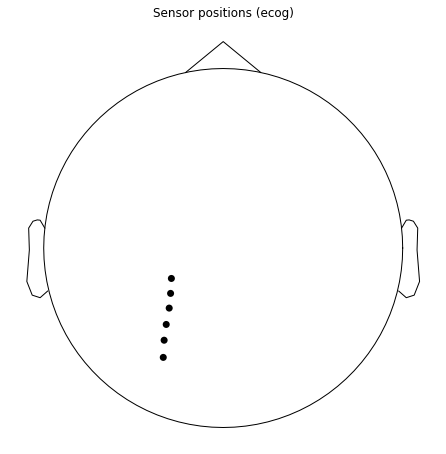

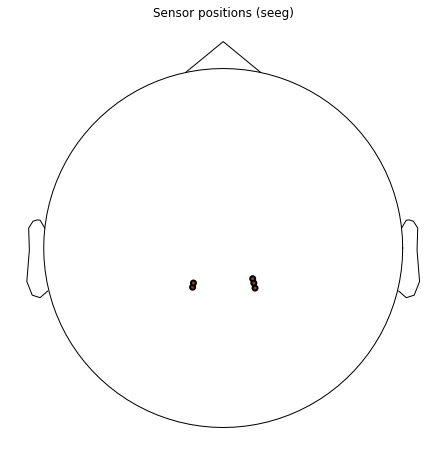

In [9]:
raw.plot_sensors(ch_type='ecog')
plt.show()
raw.plot_sensors(ch_type='seeg')
plt.show()

#### Using write_raw_bids, rewrite same file into "Datasets/mne_bids_example/" to do some tests

In [10]:
new_root = '/Users/richardkoehler/Charité - Universitätsmedizin Berlin/Interventional Cognitive Neuromodulation - Data/Datasets/mne_bids_example/'
test_file.update(root=new_root)
mne_bids.write_raw_bids(raw, bids_path=test_file, verbose=False)

Extracting parameters from /Users/richardkoehler/Charité - Universitätsmedizin Berlin/Interventional Cognitive Neuromodulation - Data/Datasets/BIDS_Berlin/sub-002/ses-20200131/ieeg/sub-002_ses-20200131_task-SelfpacedRotationR_acq-MedOn+StimOff_run-4_ieeg.vhdr...
Setting channel info structure...


BIDSPath(
root: /Users/richardkoehler/Charité - Universitätsmedizin Berlin/Interventional Cognitive Neuromodulation - Data/Datasets/mne_bids_example
datatype: ieeg
basename: sub-002_ses-20200131_task-SelfpacedRotationR_acq-MedOn+StimOff_run-4_ieeg.vhdr)

#### Now rewrite file with non BIDS-compliant filename using pybv, as mne_bids only accepts entities (handles) that are defined in BIDS

In [11]:
new_filename = "sub-002_ses-20200131_task-SelfpacedRotationR_med-ON_stim-OFF_run-4_ieeg"
data = raw.get_data()
sfreq = raw.info['sfreq']
ch_names = raw.ch_names
folder_out = test_file.directory

In [12]:
pybv.write_brainvision(data=data, sfreq=sfreq, ch_names=ch_names,
                           fname_base=new_filename,
                           folder_out=folder_out,
                           events=None, resolution=1e-7,
                           fmt='binary_float32', meas_date=None)

#### Now get the filepaths of our two datasets that are identical except for the filename

In [13]:
task_prefix = ["SelfpacedRotation"]
ieeg_files = IO.get_all_files(path=new_root, suffix=['.vhdr'], get_bids=False, prefix=task_prefix, bids_root=new_root)
for idx, ieeg_file in enumerate(ieeg_files):
    print(idx, ": ", os.path.basename(ieeg_file))

0 :  sub-002_ses-20200131_task-SelfpacedRotationR_acq-MedOn+StimOff_run-4_ieeg.vhdr
1 :  sub-002_ses-20200131_task-SelfpacedRotationR_med-ON_stim-OFF_run-4_ieeg.vhdr


#### Get all entities (handles) from the BIDS-compliant file

In [15]:
entities_0 = mne_bids.get_entities_from_fname(ieeg_files[0])
print(entities_0)

{'subject': '002', 'session': '20200131', 'task': 'SelfpacedRotationR', 'acquisition': 'MedOn+StimOff', 'run': '4', 'processing': None, 'space': None, 'recording': None, 'split': None, 'suffix': 'ieeg'}


#### Problem: mne_bids doesn't work at all with non BIDS-compliant file names

In [16]:
entities_1 = mne_bids.get_entities_from_fname(ieeg_files[1])
print(entities_1)

KeyError: 'Unexpected entity "med" found in filename "/Users/richardkoehler/Charité - Universitätsmedizin Berlin/Interventional Cognitive Neuromodulation - Data/Datasets/mne_bids_example/sub-002/ses-20200131/ieeg/sub-002_ses-20200131_task-SelfpacedRotationR_med-ON_stim-OFF_run-4_ieeg.vhdr"'

#### But we can still read in non BIDS-compliant data using other functions...

In [26]:
raw_new = mne.io.read_raw_brainvision(ieeg_files[1])

Extracting parameters from /Users/richardkoehler/Charité - Universitätsmedizin Berlin/Interventional Cognitive Neuromodulation - Data/Datasets/mne_bids_example/sub-002/ses-20200131/ieeg/sub-002_ses-20200131_task-SelfpacedRotationR_med-ON_stim-OFF_run-4_ieeg.vhdr...
Setting channel info structure...


#### ...however, events are not extracted from the **events.tsv and added as annotations

In [42]:
events, event_id = mne.events_from_annotations(raw_new)
print(events)

[]
